In [2]:
# importing the all main libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize

C:\Users\rajpu\anaconda7\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
X_train = np.loadtxt(r"C:\Users\rajpu\Downloads\input.csv",delimiter = ',')
Y_train = np.loadtxt(r"C:\Users\rajpu\Downloads\labels.csv",delimiter = ',')


X_test = np.loadtxt(r"C:\Users\rajpu\Downloads\input_test.csv",delimiter = ',')
y_test = np.loadtxt(r"C:\Users\rajpu\Downloads\labels_test (1).csv",delimiter = ',')

In [4]:
print("shape of X_train",X_train.shape)
print("shape of Y_train",Y_train.shape)


print("shape of X_test",X_test.shape)
print("shape of Y_test",y_test.shape)

shape of X_train (2000, 30000)
shape of Y_train (2000,)
shape of X_test (400, 30000)
shape of Y_test (400,)


# 2000 is the number of images for training and 400 is number for testing

# now reshaping my training and testing data

In [5]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)


X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = y_test.reshape(len(y_test),1)


X_train = X_train/255.0
Y_train = Y_train/255.0


In [6]:
print("shape of X_train",X_train.shape)
print("shape of Y_train",Y_train.shape)


print("shape of X_test",X_test.shape)
print("shape of Y_test",y_test.shape)

shape of X_train (2000, 100, 100, 3)
shape of Y_train (2000, 1)
shape of X_test (400, 100, 100, 3)
shape of Y_test (400,)


In [7]:
import random
import matplotlib.pyplot as plt

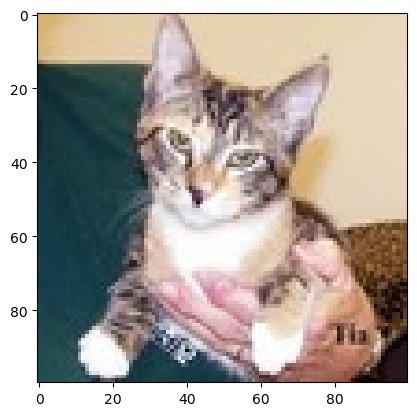

In [26]:
# any random picture from my dataset
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [30]:
# Check unique classes in Y_train
unique_classes = np.unique(Y_train)
print("Unique Classes:", unique_classes)
print("Number of Unique Classes:", len(unique_classes))


Unique Classes: [0.         0.00392157]
Number of Unique Classes: 2


In [31]:
# Convert continuous labels to categorical labels
threshold = 0.001  # Adjust threshold as needed
Y_train_categorical = np.where(Y_train > threshold, 1, 0)
Y_test_categorical = np.where(Y_test > threshold, 1, 0)

# Check unique classes in Y_train_categorical
unique_classes_categorical = np.unique(Y_train_categorical)
print("Unique Classes (Categorical):", unique_classes_categorical)
print("Number of Unique Classes (Categorical):", len(unique_classes_categorical))


Unique Classes (Categorical): [0 1]
Number of Unique Classes (Categorical): 2


In [33]:
# Print unique classes and their counts
unique_classes, class_counts = np.unique(Y_train_categorical, return_counts=True)
print("Unique Classes:", unique_classes)
print("Class Counts:", class_counts)


Unique Classes: [0]
Class Counts: [2000]


# let us try again

In [28]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [29]:
cat_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\cats"
dog_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\dogs"


In [30]:
# Function to load images from a folder and convert them to numpy arrays
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                # Convert the image to a numpy array and flatten it
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label)
    return images, labels

In [31]:
# Load images from the cat and dog folders
cat_images, cat_labels = load_images_from_folder(cat_folder, 0)  # Label 0 for cat
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)  # Label 1 for dog


In [32]:
# Concatenate cat and dog images and labels
images = cat_images + dog_images
labels = cat_labels + dog_labels


In [34]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the paths to the folders containing the images
cat_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\cats"
dog_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\dogs"

# Function to load and resize images from a folder and convert them to numpy arrays
def load_images_from_folder(folder, label, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the target size
                img = img.resize(target_size)
                # Convert the image to a numpy array and flatten it
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label)
    return images, labels

# Load images from the cat and dog folders and resize them to a target size
cat_images, cat_labels = load_images_from_folder(cat_folder, 0)
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)

# Concatenate cat and dog images and labels
images = cat_images + dog_images
labels = cat_labels + dog_labels

# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.577


In [10]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the paths to the folders containing the images
cat_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\cats"
dog_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\dogs"

# Function to load and resize images from a folder and convert them to numpy arrays
def load_images_from_folder(folder, label, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the target size
                img = img.resize(target_size)
                # Convert the image to a numpy array and flatten it
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label)
    return images, labels

# Load images from the cat and dog folders and resize them to a target size
cat_images, cat_labels = load_images_from_folder(cat_folder, 0)
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)

# Concatenate cat and dog images and labels
images = cat_images + dog_images
labels = cat_labels + dog_labels

# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='rbf')  
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.652


In [35]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the paths to the folders containing the images
cat_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\cats"
dog_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\dogs"

# Function to load and resize images from a folder and convert them to numpy arrays
def load_images_from_folder(folder, label, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the target size
                img = img.resize(target_size)
                # Convert the image to a numpy array and flatten it
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label)
    return images, labels

# Load images from the cat and dog folders and resize them to a target size
cat_images, cat_labels = load_images_from_folder(cat_folder, 0)
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)

# Concatenate cat and dog images and labels
images = cat_images + dog_images
labels = cat_labels + dog_labels

# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='poly')  
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.59


In [11]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the paths to the folders containing the images
cat_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\cats"
dog_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\dogs"

# Function to load and resize images from a folder and convert them to numpy arrays
def load_images_from_folder(folder, label, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the target size
                img = img.resize(target_size)
                # Convert the image to a numpy array and flatten it
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label)
    return images, labels

# Load images from the cat and dog folders and resize them to a target size
cat_images, cat_labels = load_images_from_folder(cat_folder, 0)
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)

# Concatenate cat and dog images and labels
images = cat_images + dog_images
labels = cat_labels + dog_labels

# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='sigmoid')  
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.516


In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the paths to the folders containing the images
cat_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\cats"
dog_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\dogs"

# Function to load and resize images from a folder and convert them to numpy arrays
def load_images_from_folder(folder, label, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the target size
                img = img.resize(target_size)
                # Convert the image to a numpy array and flatten it
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label)
    return images, labels

# Load images from the cat and dog folders and resize them to a target size
cat_images, cat_labels = load_images_from_folder(cat_folder, 0)
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)

# Concatenate cat and dog images and labels
images = cat_images + dog_images
labels = cat_labels + dog_labels

# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [9]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Define the paths to the folders containing the images
cat_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\cats"
dog_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\dogs"

# Function to load, resize, and convert images from a folder and convert them to numpy arrays
def load_images_from_folder(folder, label, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the target size
                img = img.resize(target_size)
                # Convert the image to grayscale
                img = img.convert('L')
                # Convert the image to a numpy array and flatten it
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label)
    return images, labels

# Load images from the cat and dog folders, resize them, and convert them to numpy arrays
cat_images, cat_labels = load_images_from_folder(cat_folder, 0)
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)

# Concatenate cat and dog images and labels
images = cat_images + dog_images
labels = cat_labels + dog_labels

# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for preprocessing and SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),  # Adjust the number of components as needed
    ('svm', SVC(kernel='rbf'))  # Adjust the kernel as needed
])

# Define the parameters for grid search
parameters = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 0.01, 0.001],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the SVM classifier with the best parameters
svm = SVC(kernel='rbf', C=best_params['svm__C'], gamma=best_params['svm__gamma'])
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the paths to the folders containing the images
cat_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\cats"
dog_folder = r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\test\dogs"

# Function to load and resize images from a folder and convert them to numpy arrays
def load_images_from_folder(folder, label, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the target size
                img = img.resize(target_size)
                # Convert the image to a numpy array and flatten it
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label)
    return images, labels

# Load images from the cat and dog folders and resize them to a target size
cat_images, cat_labels = load_images_from_folder(cat_folder, 0)
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)

# Concatenate cat and dog images and labels
images = cat_images + dog_images
labels = cat_labels + dog_labels

# Convert the lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='rbf')  
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
